## Breast Cancer Detection Thermography


This is code for the proceeding article in SPIE Thermosense 2023, 2 - 4 May 2023, Orlando, FL.

If you publish any work which uses this package, please cite the following publication:
Leonardo D. Buitrago, Jimmy J. Azarnoosh, Xavier P.V. Maldague, and Bardia Yousefi (May, 2023) Optimal Thermomic Biomarkers for Early Diagnosis of Breast Cancer. SPIE thermosense, Orlando, FL.

# SPIE Thermoses 2023 Classification Analysis:

## Table of contents:
* [Introduction](#Intro:)
* [Part I](#Part_I)
* [Part II (NMF Gauss)](#Part_II)
* [Part III (NMf Gauss+Clinical)](#Part_III)
* [Part IV (NMF Bell)](#Part_IV)
* [Part V NMF (Bell+Clinical)](#Part_V)
* [Part VI (Deep NMF Gauss)](#Part_VI)
* [Part VII (Deep NMF Gauss+Clinical)](#Part_VII)
* [Part VIII (Deep NMF Bell)](#Part_VIII)
* [Part IX (Deep NMF Bell+Clinical)](#Part_IX)
* [Part X (Combined ROC curves)](#Part_X)

# Intro:

This research project was done using two classification methods: Random Forest and Logistic regression. Parts II through IX have both Random Forest and Logistic Regression done, as well as a 7 fold cross validation for each classifer. Part I consists of a re-calculation of the Clincal accuracy using mean(+- Standard deviation) in the 7 fold cross-validation.The training and testing data was split using a 70-30 split.

Part X contains Combined ROC curves for both Random Forest and Logistic Regression classifiers.

### Importing starting libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Retrieving all 4 datasets:

In [2]:
NMF_Gauss = pd.read_csv("C:/Users/paiin/OneDrive/Documents/New folder/SPIE-thermosense2023/Compressed-FZ_NMF_Alpha.csv")
NMF_Gauss.rename( columns={'Unnamed: 0':'Patient Number'}, inplace=True )

NMF_Bell = pd.read_csv("C:/Users/paiin/OneDrive/Documents/New folder/SPIE-thermosense2023/Compressed-FZ_NMF_Bell.csv")
NMF_Bell.rename( columns={'Unnamed: 0':'Patient Number'}, inplace=True )

Deep_NMFGauss = pd.read_csv("C:/Users/paiin/OneDrive/Documents/New folder/SPIE-thermosense2023/Compressed-FZ_Deep-semiNMF_Alpha.csv")
Deep_NMFGauss.rename( columns={'Unnamed: 0':'Patient Number'}, inplace=True )

Deep_NMFBell= pd.read_csv("C:/Users/paiin/OneDrive/Documents/New folder/SPIE-thermosense2023/Compressed-FZ_Deep-semiNMF_Bell.csv")
Deep_NMFBell.rename( columns={'Unnamed: 0':'Patient Number'}, inplace=True )

In [3]:
NMF_Gauss = NMF_Gauss.set_index('Patient Number')
NMF_Gauss.index = NMF_Gauss.index.str.replace('p',' ').astype(int)
NMF_Gauss = NMF_Gauss.sort_index()

In [4]:
NMF_Bell =  NMF_Bell.set_index('Patient Number')
NMF_Bell.index = NMF_Bell.index.str.replace('p',' ').astype(int)
NMF_Bell = NMF_Bell.sort_index()

In [5]:
Deep_NMFGauss =  Deep_NMFGauss.set_index('Patient Number')
Deep_NMFGauss.index = Deep_NMFGauss.index.str.replace('p',' ').astype(int)
Deep_NMFGauss = Deep_NMFGauss.sort_index()

In [6]:
Deep_NMFBell =  Deep_NMFBell.set_index('Patient Number')
Deep_NMFBell.index = Deep_NMFBell.index.str.replace('p',' ').astype(int)
Deep_NMFBell = Deep_NMFBell.sort_index()

### Retrieving clinical dataset "Diagnosis" column:

In [7]:
Clinical = pd.read_excel("C:/Users/paiin/Downloads/ML Project1 Leo Buitrago/DMR-clinic infox-.xlsx")
Clinical = Clinical.iloc[:,[0,3,4,5,1]];
Clinical['diagnosis'].replace(['healthy','unknown','Sick'],
                       [0,0,1], inplace = True)
Clinical['race'].replace(['pardo','black','white','w','W','indigenous','mulatto'],
                       [0,1,2,2,2,3,4], inplace = True)
Clinical['marital status'].replace(['widowed','widow','married','single','divorced'],
                            [0,0,1,2,3], inplace = True)
Clinical = Clinical.set_index('id')
Clinical

,age,race,marital status,diagnosis
id,,,,
1,71,0,0,0
2,67,0,1,0
4,65,1,1,0
5,64,2,1,0
6,52,0,2,0
...,...,...,...,...
283,48,1,1,1
284,67,2,0,0
285,54,1,2,1


## Merging the 4 datasets w/ the clinical dataset:

### NMF Gauss:

In [8]:
NMF_Gauss = NMF_Gauss.join(Clinical)
NMF_Gauss

,tmx1,tmx2,tmx3,tmx4,tmx5,tmx6,tmx7,age,race,marital status,diagnosis
Patient Number,,,,,,,,,,,
1,-0.010664,0.004279,-0.009549,-0.010762,-0.010160,-0.020773,-0.008008,71,0,0,0
2,0.002010,0.007527,-0.018007,-0.002307,0.010547,-0.018270,-0.018349,67,0,1,0
4,0.027589,-0.001672,0.018161,-0.018572,-0.002127,0.003300,-0.003382,65,1,1,0
5,-0.009408,-0.003683,-0.007877,-0.004645,-0.007961,-0.016928,-0.025252,64,2,1,0
6,-0.009491,0.029402,-0.012336,-0.013506,-0.016741,0.032463,0.011213,52,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
283,-0.006462,0.028027,-0.010008,-0.007859,-0.003899,0.028082,0.009051,48,1,1,1
284,-0.014485,0.014822,0.016530,0.011877,-0.009895,0.009321,-0.022379,67,2,0,0
285,0.001380,0.012317,-0.016908,0.002548,0.021272,-0.012973,-0.007092,54,1,2,1


### NMF Bell:

In [9]:
NMF_Bell = NMF_Bell.join(Clinical)
NMF_Bell

,tmx1,tmx2,tmx3,tmx4,tmx5,tmx6,tmx7,age,race,marital status,diagnosis
Patient Number,,,,,,,,,,,
1,0.001755,-0.009130,0.021889,-0.002391,-0.003881,-0.005226,0.005448,71,0,0,0
2,0.006625,-0.009623,0.001859,0.038991,-0.003238,-0.001942,0.002405,67,0,1,0
4,0.021118,0.014048,-0.012493,-0.014038,0.012569,-0.016942,-0.013165,65,1,1,0
5,-0.010972,-0.004264,-0.000943,-0.006866,0.012907,-0.000275,0.032738,64,2,1,0
6,-0.006823,-0.016133,-0.014031,0.011714,0.000861,0.004469,-0.015246,52,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
283,0.007144,-0.009216,-0.005881,0.047482,-0.000149,-0.007389,0.011637,48,1,1,1
284,-0.019392,0.003548,-0.010652,-0.004466,-0.002088,0.028087,0.025018,67,2,0,0
285,-0.006850,0.006791,-0.003342,-0.000728,0.037847,-0.015863,0.006173,54,1,2,1


### Deep NMF Gauss:

In [10]:
Deep_NMFGauss = Deep_NMFGauss.join(Clinical)
Deep_NMFGauss

,tmx1,tmx2,tmx3,tmx4,tmx5,tmx6,tmx7,age,race,marital status,diagnosis
Patient Number,,,,,,,,,,,
1,-0.022364,0.014819,-0.007169,0.003909,0.000230,-0.006494,0.003942,71,0,0,0
2,0.020918,0.015556,0.000859,0.004762,0.012614,-0.010033,-0.002290,67,0,1,0
4,-0.017220,0.005170,0.005898,-0.021655,0.025073,0.000224,0.015767,65,1,1,0
5,0.007337,-0.014344,-0.011761,0.005014,0.003833,-0.006462,-0.005056,64,2,1,0
6,0.011710,-0.008397,-0.020201,-0.013749,-0.020514,-0.006743,0.014319,52,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
283,-0.025436,0.021219,-0.018572,0.016901,-0.011348,-0.000614,-0.008318,48,1,1,1
284,0.009260,-0.012237,-0.023248,-0.022455,-0.026705,0.008202,0.003239,67,2,0,0
285,-0.025587,0.021568,-0.019026,0.021038,-0.019709,-0.005977,-0.031650,54,1,2,1


### Deep NMF Bell:

In [11]:
Deep_NMFBell = Deep_NMFBell.join(Clinical)
Deep_NMFBell

,tmx1,tmx2,tmx3,tmx4,tmx5,tmx6,tmx7,age,race,marital status,diagnosis
Patient Number,,,,,,,,,,,
1,0.021828,0.001852,0.006259,0.024332,-0.009744,0.013501,-0.027803,71,0,0,0
2,-0.017057,0.021772,-0.008108,0.011965,-0.002593,-0.003378,0.007111,67,0,1,0
4,-0.011054,0.011257,-0.023046,-0.007758,-0.018575,0.001070,-0.003304,65,1,1,0
5,-0.006366,-0.009274,-0.007759,-0.013375,-0.006428,0.001285,0.005250,64,2,1,0
6,-0.001736,-0.022599,-0.001841,0.019558,-0.016182,-0.030402,0.000218,52,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
283,0.027502,0.015508,0.016395,0.009034,-0.018005,0.015957,-0.004337,48,1,1,1
284,-0.014563,0.019172,-0.017009,0.007196,-0.006793,-0.002869,0.011090,67,2,0,0
285,0.020811,0.000540,0.005301,0.024878,-0.008641,0.048934,-0.004653,54,1,2,1


# Part_I

## Calculating new Clinical Accuracy:

### X and Y data plus splitting into test and training sets: 

In [12]:
x0 = Clinical.iloc[:,0:3].values
y0 = Clinical.iloc[:,3].values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x0, y0, test_size = 0.3, random_state = 0)

print(X_train),print(Y_train)

[[ 37   0   1]
 [ 77   2   1]
 [ 80   2   1]
 [ 69   3   1]
 [ 67   0   2]
 [ 53   0   1]
 [ 67   0   2]
 [ 68   2   1]
 [ 62   1   0]
 [ 70   1   1]
 [ 63   1   1]
 [ 88   0   1]
 [ 59   0   1]
 [ 87   2   0]
 [ 72   2   3]
 [ 74   2   1]
 [ 73   2   2]
 [ 50   0   0]
 [ 56   0   2]
 [ 56   2   3]
 [ 61   1   2]
 [ 52   2   1]
 [ 47   0   2]
 [ 62   0   1]
 [ 61   1   2]
 [ 75   0   1]
 [ 66   1   1]
 [ 59   0   1]
 [ 59   0   1]
 [ 58   2   1]
 [ 48   1   1]
 [ 65   1   2]
 [ 59   0   1]
 [ 59   0   1]
 [ 65   1   1]
 [ 64   0   1]
 [ 52   2   1]
 [ 62   2   2]
 [ 58   1   0]
 [ 57   0   3]
 [ 55   1   2]
 [ 70   0   1]
 [ 57   2   0]
 [ 40   1   1]
 [ 64   2   0]
 [ 52   2   2]
 [ 54   0   1]
 [ 64   2   1]
 [ 55   0   0]
 [ 66   0   3]
 [ 56   0   3]
 [ 43   2   1]
 [ 54   2   3]
 [ 53   1   1]
 [ 71   0   0]
 [ 70   0   0]
 [ 65   2   0]
 [ 66   2   1]
 [ 57   2   1]
 [ 63   2   1]
 [ 55   1   1]
 [ 59   0   2]
 [ 42   0   2]
 [ 68   0   1]
 [ 43   2   3]
 [ 54   1   2]
 [ 81   2 

(None, None)

### Scaling features:

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Implementing Random forest classification + making predictions:

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


### Confusion matrix:

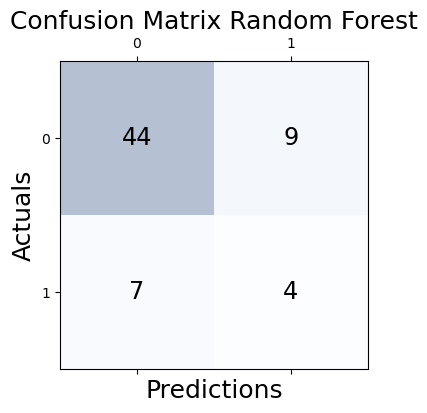

[[44  9]
 [ 7  4]]


0.75

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test,y_pred)

### Cross validation RF:

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.62 %
Standard Deviation: 9.53 %


## Logistic Regression + Predictions:

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, Y_train)

y_pred = LR.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


## Confusion Matrix:

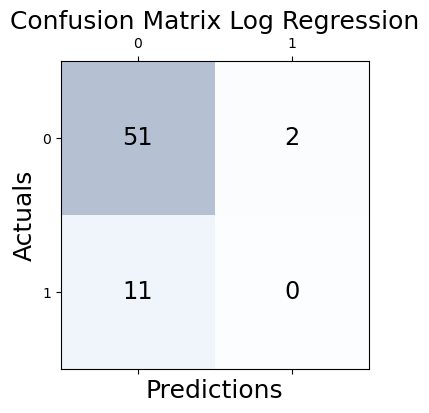

[[51  2]
 [11  0]]


0.796875

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test,y_pred)

### Cross Validation:

In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = Y_train, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.44 %
Standard Deviation: 2.09 %


# Part_II

## Implementing Classification methods to NMF Gauss dataset:

### Retrieving X and Y data:

In [20]:
x1 = NMF_Gauss.iloc[:,0:7].values
y1 = NMF_Gauss.iloc[:,10].values

In [21]:
x1

array([[-0.01066422,  0.00427885, -0.00954927, ..., -0.01016017,
        -0.0207734 , -0.0080079 ],
       [ 0.00201014,  0.00752707, -0.01800714, ...,  0.0105471 ,
        -0.01826981, -0.01834872],
       [ 0.0275891 , -0.0016723 ,  0.01816109, ..., -0.0021269 ,
         0.00329982, -0.0033823 ],
       ...,
       [ 0.0013804 ,  0.01231658, -0.01690832, ...,  0.02127195,
        -0.01297269, -0.00709158],
       [ 0.02125763, -0.00821465, -0.00078335, ..., -0.01973989,
         0.00206718,  0.00799016],
       [ 0.03110502, -0.00248165,  0.02884573, ..., -0.00998678,
         0.00932583, -0.0119142 ]])

In [22]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

### Splitting the data into train and test sets:

In [23]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

print(X_train1),print(Y_train1)

[[-0.01238231 -0.01748472 -0.01064112 ...  0.00128323 -0.0068763
   0.00360175]
 [ 0.02474111 -0.00684472  0.00677868 ... -0.02086832  0.00369119
   0.01258574]
 [ 0.01118576 -0.00239326 -0.01462187 ...  0.00487908 -0.01071684
  -0.01102531]
 ...
 [-0.01227747 -0.00409495  0.00726757 ... -0.00330334 -0.01206478
  -0.01480145]
 [ 0.01014254 -0.01818658 -0.01709586 ... -0.02627648  0.01134821
   0.01069193]
 [-0.00969657  0.02207309  0.00164788 ...  0.00429397  0.00168031
   0.00286508]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

### Scaling the features:

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

## Implementing Random Forest Classification:

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train1, Y_train1)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Making Predictions:

In [26]:
y_pred = classifier1.predict(X_test1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test1.reshape(len(Y_test1),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix:

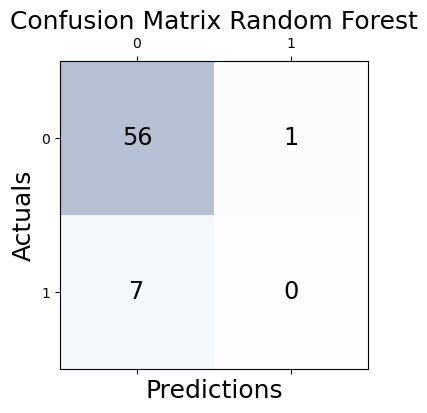

[[56  1]
 [ 7  0]]


0.875

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test1, y_pred)
accuracy_score(Y_test1, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test1,y_pred)

### Cross Validation RF:

In [28]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train1, y = Y_train1, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.55 %
Standard Deviation: 4.91 %


## Implementing Logistic Regression Classification:

In [29]:
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression(random_state = 0)
LR1.fit(X_train1, Y_train1)

LogisticRegression(random_state=0)

#### Making Predictions:

In [30]:
y_pred = LR1.predict(X_test1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test1.reshape(len(Y_test1),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix:

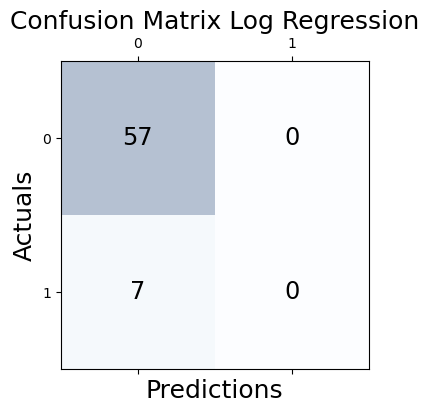

[[57  0]
 [ 7  0]]


0.890625

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test1, y_pred)
accuracy_score(Y_test1, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test1,y_pred)

### Cross validation LogR:

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR1, X = X_train1, y = Y_train1, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.59 %
Standard Deviation: 2.15 %


# Part_III

 ## Implementing Classification methods to NMF Gauss dataset + added clinical info:

## Retrieving a new X value but using same Y:

In [33]:
x1B = NMF_Gauss.iloc[:,0:10].values
x1B

array([[-1.06642151e-02,  4.27884556e-03, -9.54927199e-03, ...,
         7.10000000e+01,  0.00000000e+00,  0.00000000e+00],
       [ 2.01013810e-03,  7.52707026e-03, -1.80071437e-02, ...,
         6.70000000e+01,  0.00000000e+00,  1.00000000e+00],
       [ 2.75891025e-02, -1.67229977e-03,  1.81610854e-02, ...,
         6.50000000e+01,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.38039939e-03,  1.23165800e-02, -1.69083199e-02, ...,
         5.40000000e+01,  1.00000000e+00,  2.00000000e+00],
       [ 2.12576262e-02, -8.21464681e-03, -7.83354296e-04, ...,
         4.70000000e+01,  2.00000000e+00,  2.00000000e+00],
       [ 3.11050165e-02, -2.48164940e-03,  2.88457293e-02, ...,
         6.00000000e+01,  2.00000000e+00,  0.00000000e+00]])

### Splitting Data:

In [34]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x1B, y1, test_size = 0.3, random_state = 0)

print(X_train2),print(Y_train2)

[[-1.23823101e-02 -1.74847223e-02 -1.06411210e-02 ...  7.70000000e+01
   2.00000000e+00  1.00000000e+00]
 [ 2.47411112e-02 -6.84471501e-03  6.77868256e-03 ...  5.30000000e+01
   2.00000000e+00  1.00000000e+00]
 [ 1.11857553e-02 -2.39325576e-03 -1.46218655e-02 ...  6.90000000e+01
   3.00000000e+00  1.00000000e+00]
 ...
 [-1.22774665e-02 -4.09494780e-03  7.26756683e-03 ...  5.50000000e+01
   1.00000000e+00  2.00000000e+00]
 [ 1.01425373e-02 -1.81865764e-02 -1.70958607e-02 ...  7.60000000e+01
   1.00000000e+00  2.00000000e+00]
 [-9.69657005e-03  2.20730883e-02  1.64787565e-03 ...  7.00000000e+01
   0.00000000e+00  2.00000000e+00]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

### Scaling Features:

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

## Random Forest Classification:

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train2, Y_train2)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Making Predictions:

In [37]:
y_pred = classifier2.predict(X_test2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test2.reshape(len(Y_test2),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix:

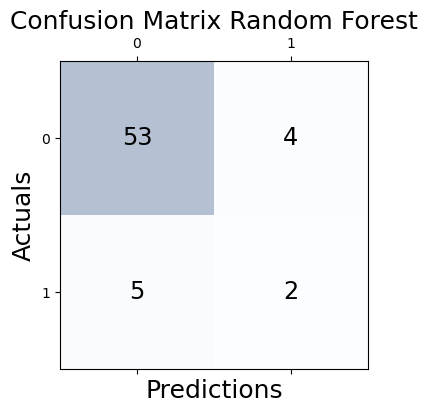

[[53  4]
 [ 5  2]]


0.859375

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test2, y_pred)
accuracy_score(Y_test2, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test2,y_pred)

### Cross Validation RF:

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train2, y = Y_train2, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.87 %
Standard Deviation: 5.36 %


## Logistic Regression:

In [40]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression(random_state = 0)
LR2.fit(X_train2, Y_train2)

LogisticRegression(random_state=0)

### Making Predictions:

In [41]:
y_pred = LR2.predict(X_test2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test2.reshape(len(Y_test2),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix:

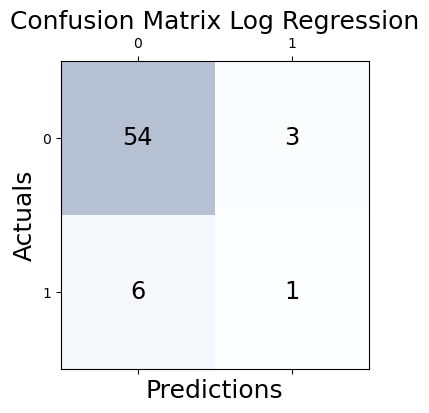

[[54  3]
 [ 6  1]]


0.859375

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test2, y_pred)
accuracy_score(Y_test2, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test2,y_pred)

### Cross Validation LogR:

In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR2, X = X_train2, y = Y_train2, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.59 %
Standard Deviation: 5.53 %


# Part_IV

## Implementing Classification methods to NMF Bell dataset:

### Retrieving X and Y data:

In [44]:
x2 = NMF_Bell.iloc[:,0:7].values
y2 = NMF_Bell.iloc[:,10].values

In [45]:
x2

array([[ 0.00175464, -0.00913014,  0.02188886, ..., -0.00388073,
        -0.00522628,  0.00544818],
       [ 0.00662536, -0.00962327,  0.00185901, ..., -0.00323842,
        -0.00194152,  0.00240524],
       [ 0.02111804,  0.0140475 , -0.01249257, ...,  0.01256869,
        -0.01694181, -0.01316488],
       ...,
       [-0.00684993,  0.00679051, -0.0033415 , ...,  0.03784739,
        -0.0158631 ,  0.00617282],
       [ 0.00722463, -0.00274768,  0.03593081, ...,  0.00916711,
         0.02356338,  0.00259436],
       [ 0.02600601,  0.01279644, -0.01310865, ..., -0.00515724,
         0.00269089, -0.00172102]])

In [46]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

### Splitting Data:

In [47]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

print(X_train3),print(Y_train3)

[[-0.00681658 -0.01685144  0.0047427  ... -0.01831254 -0.02779972
  -0.00989628]
 [ 0.02030357  0.01254545 -0.00619829 ...  0.01130129 -0.00309373
  -0.0148843 ]
 [ 0.01315015  0.0008913   0.00915961 ...  0.00730116  0.01097421
  -0.00927236]
 ...
 [-0.00969255 -0.01721032 -0.00329553 ... -0.01149391 -0.0138012
  -0.00460129]
 [ 0.01142096  0.00359465  0.02275893 ...  0.01729551  0.02440959
  -0.02189787]
 [-0.02638139  0.03142132  0.00080857 ... -0.02189589  0.0118307
   0.00541938]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

### Scaling the features:

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

## Random Forest Classification:

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train3, Y_train3)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Making Predictions:

In [50]:
y_pred = classifier3.predict(X_test3)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test3.reshape(len(Y_test3),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix:

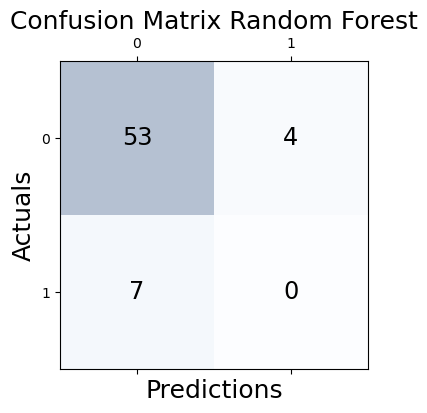

[[53  4]
 [ 7  0]]


0.828125

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test3, y_pred)
accuracy_score(Y_test3, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test3,y_pred)

### Cross Validation RF:

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X_train3, y = Y_train3, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.23 %
Standard Deviation: 3.47 %


## Logistic Regression:

In [53]:
from sklearn.linear_model import LogisticRegression
LR3 = LogisticRegression(random_state = 0)
LR3.fit(X_train3, Y_train3)

LogisticRegression(random_state=0)

### Making Predictions:

In [54]:
y_pred = LR3.predict(X_test3)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test3.reshape(len(Y_test3),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix:

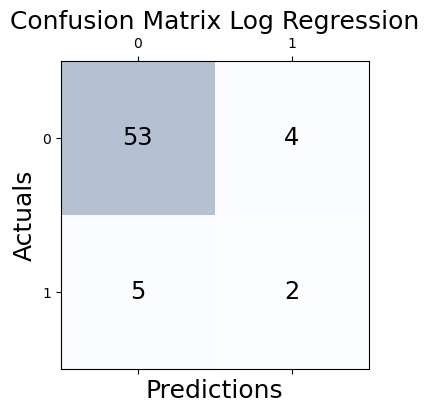

[[53  4]
 [ 5  2]]


0.859375

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test3, y_pred)
accuracy_score(Y_test3, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test3,y_pred)

### Cross Validation LogR:

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR3, X = X_train3, y = Y_train3, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.27 %
Standard Deviation: 4.71 %


# Part_V

## Implementing Classification methods to NMF Bell dataset + clinical features:

### New X value + Splitting data:

In [57]:
x2B = NMF_Bell.iloc[:,0:10].values

from sklearn.model_selection import train_test_split

X_train4, X_test4, Y_train4, Y_test4 = train_test_split(x2B, y2, test_size = 0.3, random_state = 0)

print(X_train4),print(Y_train4)

[[-6.81657831e-03 -1.68514389e-02  4.74269995e-03 ...  7.70000000e+01
   2.00000000e+00  1.00000000e+00]
 [ 2.03035700e-02  1.25454514e-02 -6.19829225e-03 ...  5.30000000e+01
   2.00000000e+00  1.00000000e+00]
 [ 1.31501471e-02  8.91301221e-04  9.15961119e-03 ...  6.90000000e+01
   3.00000000e+00  1.00000000e+00]
 ...
 [-9.69255058e-03 -1.72103189e-02 -3.29552870e-03 ...  5.50000000e+01
   1.00000000e+00  2.00000000e+00]
 [ 1.14209560e-02  3.59464730e-03  2.27589296e-02 ...  7.60000000e+01
   1.00000000e+00  2.00000000e+00]
 [-2.63813861e-02  3.14213223e-02  8.08571017e-04 ...  7.00000000e+01
   0.00000000e+00  2.00000000e+00]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

### Rescaling data:

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train4 = sc.fit_transform(X_train4)
X_test4 = sc.transform(X_test4)

## Random forest + predictions:

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(X_train4, Y_train4)

y_pred = classifier4.predict(X_test4)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test4),1)),1))

[[0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


## Confusion Matrix:

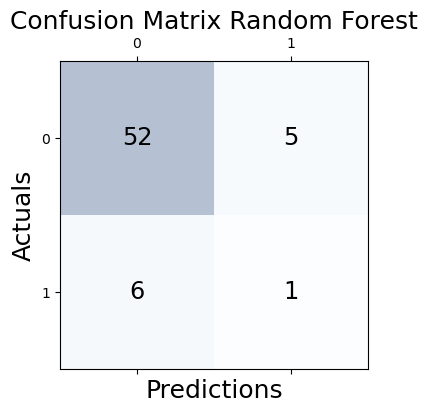

[[52  5]
 [ 6  1]]


0.828125

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test4, y_pred)
accuracy_score(Y_test4, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test4,y_pred)

### Cross validation RF:

In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X = X_train4, y = Y_train4, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.59 %
Standard Deviation: 4.91 %


## Logistic Regression + predictions:

In [62]:
from sklearn.linear_model import LogisticRegression
LR4 = LogisticRegression(random_state = 0)
LR4.fit(X_train4, Y_train4)

y_pred = LR4.predict(X_test4)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test4.reshape(len(Y_test4),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

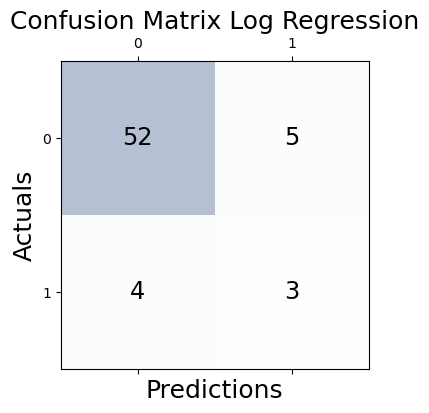

[[52  5]
 [ 4  3]]


0.859375

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test4, y_pred)
accuracy_score(Y_test4, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test4,y_pred)

### Cross Validation LogR:

In [64]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR4, X = X_train4, y = Y_train4, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.63 %
Standard Deviation: 3.97 %


# Part_VI

## Implementing Classification methods to Deep NMF Gaussian dataset:

## Retrieving X and Y values and splitting data:

In [65]:
x3 = Deep_NMFGauss.iloc[:,0:7].values
y3 = Deep_NMFGauss.iloc[:,10].values

from sklearn.model_selection import train_test_split

X_train5, X_test5, Y_train5, Y_test5 = train_test_split(x3, y3, test_size = 0.3, random_state = 0)

print(X_train5),print(Y_train5)

[[ 0.01276098 -0.00654236 -0.01094393 ...  0.03725767 -0.02293802
  -0.0006244 ]
 [-0.02468633  0.01959967 -0.01549247 ... -0.01290012 -0.00639747
  -0.03214972]
 [ 0.00290686 -0.01521892 -0.00027318 ... -0.00268998 -0.0100957
  -0.0059029 ]
 ...
 [ 0.00743866 -0.01395479 -0.01025092 ...  0.0059302  -0.00384299
  -0.00202214]
 [ 0.00718862 -0.00993322  0.00683487 ...  0.01804857  0.02140115
   0.01346947]
 [-0.02401172  0.01818553 -0.0132547  ...  0.00870641  0.0051208
   0.05371967]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

## Rescaling data:

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train5 = sc.fit_transform(X_train5)
X_test5 = sc.transform(X_test5)

## Random Forest + Prediction:

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train5, Y_train5)

y_pred = classifier5.predict(X_test5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test5.reshape(len(Y_test5),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

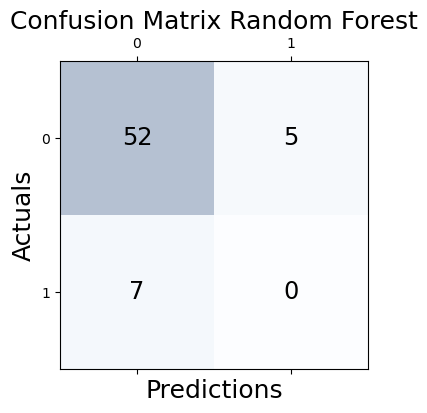

[[52  5]
 [ 7  0]]


0.8125

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test5, y_pred)
accuracy_score(Y_test5, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test5,y_pred)

### Cross validation RF:

In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X = X_train5, y = Y_train5, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.91 %
Standard Deviation: 5.61 %


## Logistic Regression + Predictions:

In [70]:
from sklearn.linear_model import LogisticRegression
LR5 = LogisticRegression(random_state = 0)
LR5.fit(X_train5, Y_train5)

y_pred = LR5.predict(X_test5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test5.reshape(len(Y_test5),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

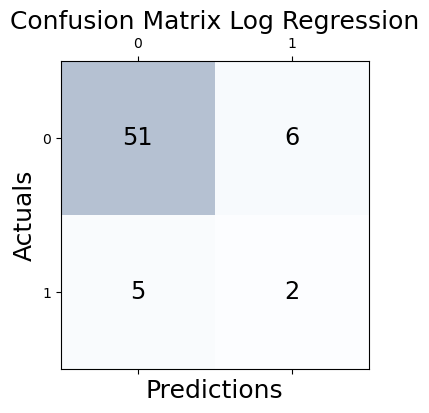

[[51  6]
 [ 5  2]]


0.828125

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test5, y_pred)
accuracy_score(Y_test5, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test5,y_pred)

### Cross validation LogR:

In [72]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR5, X = X_train5, y = Y_train5, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.95 %
Standard Deviation: 5.69 %


# Part_VII

## Implementing Classification methods to Deep NMF Gaussian + Clinical dataset:

## Retrieving new X value + splitting data:

In [73]:
x3B = Deep_NMFGauss.iloc[:,0:10].values
from sklearn.model_selection import train_test_split

X_train6, X_test6, Y_train6, Y_test6 = train_test_split(x3B, y3, test_size = 0.3, random_state = 0)

print(X_train6),print(Y_train6)

[[ 1.27609797e-02 -6.54236076e-03 -1.09439344e-02 ...  7.70000000e+01
   2.00000000e+00  1.00000000e+00]
 [-2.46863252e-02  1.95996747e-02 -1.54924654e-02 ...  5.30000000e+01
   2.00000000e+00  1.00000000e+00]
 [ 2.90686064e-03 -1.52189150e-02 -2.73182513e-04 ...  6.90000000e+01
   3.00000000e+00  1.00000000e+00]
 ...
 [ 7.43866301e-03 -1.39547915e-02 -1.02509177e-02 ...  5.50000000e+01
   1.00000000e+00  2.00000000e+00]
 [ 7.18861811e-03 -9.93321593e-03  6.83487190e-03 ...  7.60000000e+01
   1.00000000e+00  2.00000000e+00]
 [-2.40117192e-02  1.81855285e-02 -1.32547020e-02 ...  7.00000000e+01
   0.00000000e+00  2.00000000e+00]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

## Rescaling data:

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train6 = sc.fit_transform(X_train6)
X_test6 = sc.transform(X_test6)

## Random Forest + Prediction:

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier6.fit(X_train6, Y_train6)

y_pred = classifier6.predict(X_test6)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test6.reshape(len(Y_test6),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

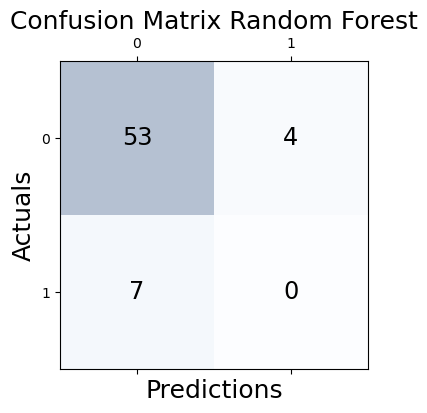

[[53  4]
 [ 7  0]]


0.828125

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test6, y_pred)
accuracy_score(Y_test6, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test6,y_pred)

### Cross validation RF:

In [77]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier6, X = X_train6, y = Y_train6, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.59 %
Standard Deviation: 4.91 %


## Logistic Regression + Prediction:

In [78]:
from sklearn.linear_model import LogisticRegression
LR6 = LogisticRegression(random_state = 0)
LR6.fit(X_train6, Y_train6)

y_pred = LR6.predict(X_test6)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test6.reshape(len(Y_test6),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

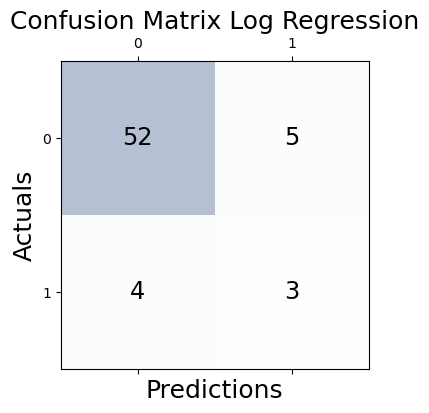

[[52  5]
 [ 4  3]]


0.859375

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test6, y_pred)
accuracy_score(Y_test6, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test6,y_pred)

### Cross validation LogR:

In [80]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR6, X = X_train6, y = Y_train6, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.27 %
Standard Deviation: 4.71 %


# Part_VIII

## Implementing Classification methods to Deep NMF Bell dataset:

## Retrieving X and Y Data and splitting data:

In [81]:
x4 = Deep_NMFBell.iloc[:,0:7].values
y4 = Deep_NMFBell.iloc[:,10].values

from sklearn.model_selection import train_test_split

X_train7, X_test7, Y_train7, Y_test7 = train_test_split(x4, y4, test_size = 0.3, random_state = 0)

print(X_train7),print(Y_train7)

[[-0.00890852 -0.01908896  0.02288553 ...  0.00264452 -0.00185521
   0.01890235]
 [ 0.02531762  0.00986055  0.01169139 ... -0.01407109  0.0464487
  -0.00158267]
 [-0.0129487  -0.00764513  0.01815583 ... -0.00489956  0.00658939
  -0.01734715]
 ...
 [-0.01324348  0.00299012 -0.00046373 ... -0.01381928 -0.00518624
   0.00025068]
 [-0.01714425  0.01136589  0.01531893 ...  0.01143598  0.00387056
  -0.01903245]
 [-0.00333825 -0.01186179 -0.01067727 ... -0.01649272 -0.02850793
  -0.00447205]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

## Rescaling Data:

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train7 = sc.fit_transform(X_train7)
X_test7 = sc.transform(X_test7)

## Random Forest + prediction:

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier7.fit(X_train7, Y_train7)

y_pred = classifier7.predict(X_test7)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test7.reshape(len(Y_test7),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

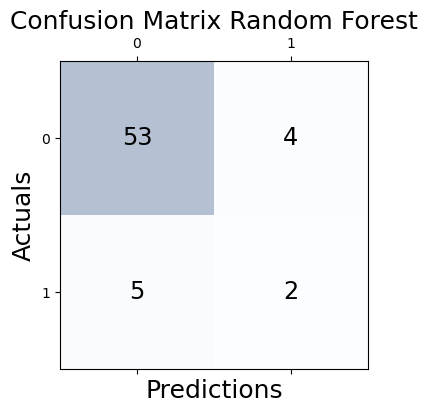

[[53  4]
 [ 5  2]]


0.859375

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test7, y_pred)
accuracy_score(Y_test7, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test7,y_pred)

### Cross validation RF:

In [85]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier7, X = X_train7, y = Y_train7, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.99 %
Standard Deviation: 4.30 %


## Logistic Regression + prediction:

In [86]:
from sklearn.linear_model import LogisticRegression
LR7 = LogisticRegression(random_state = 0)
LR7.fit(X_train7, Y_train7)

y_pred = LR7.predict(X_test7)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test7.reshape(len(Y_test7),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

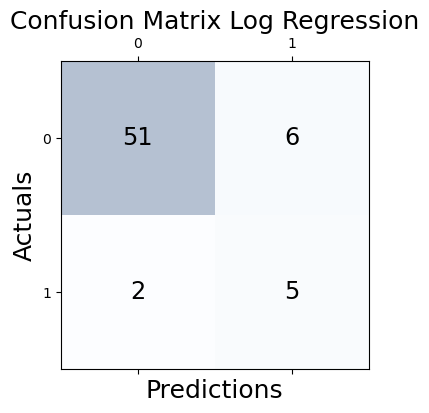

[[51  6]
 [ 2  5]]


0.875

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test7, y_pred)
accuracy_score(Y_test7, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test7,y_pred)

### Cross Validation LogR:

In [88]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR7, X = X_train7, y = Y_train7, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.99 %
Standard Deviation: 7.99 %


# Part_IX

## Implementing Classification methods to Deep NMF Bell + Clinical dataset:

## Retrieving new X value and splitting data:

In [89]:
x4B = Deep_NMFBell.iloc[:,0:10].values

from sklearn.model_selection import train_test_split

X_train8, X_test8, Y_train8, Y_test8 = train_test_split(x4B, y4, test_size = 0.3, random_state = 0)

print(X_train8),print(Y_train8)

[[-8.90851542e-03 -1.90889580e-02  2.28855277e-02 ...  7.70000000e+01
   2.00000000e+00  1.00000000e+00]
 [ 2.53176224e-02  9.86055025e-03  1.16913863e-02 ...  5.30000000e+01
   2.00000000e+00  1.00000000e+00]
 [-1.29486954e-02 -7.64512813e-03  1.81558287e-02 ...  6.90000000e+01
   3.00000000e+00  1.00000000e+00]
 ...
 [-1.32434757e-02  2.99011810e-03 -4.63726045e-04 ...  5.50000000e+01
   1.00000000e+00  2.00000000e+00]
 [-1.71442534e-02  1.13658864e-02  1.53189268e-02 ...  7.60000000e+01
   1.00000000e+00  2.00000000e+00]
 [-3.33825361e-03 -1.18617922e-02 -1.06772746e-02 ...  7.00000000e+01
   0.00000000e+00  2.00000000e+00]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


(None, None)

## Rescaling Data:

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train8 = sc.fit_transform(X_train8)
X_test8 = sc.transform(X_test8)

## Random Forest + prediction:

In [91]:
from sklearn.ensemble import RandomForestClassifier
classifier8 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier8.fit(X_train8, Y_train8)

y_pred = classifier8.predict(X_test8)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test8.reshape(len(Y_test8),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

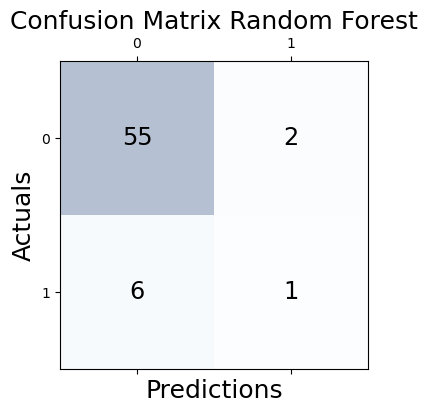

[[55  2]
 [ 6  1]]


0.875

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test8, y_pred)
accuracy_score(Y_test8, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test8,y_pred)

### Cross validation RF:

In [93]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier8, X = X_train8, y = Y_train8, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.27 %
Standard Deviation: 3.97 %


## Logistic Regression + prediction:

In [94]:
from sklearn.linear_model import LogisticRegression
LR8 = LogisticRegression(random_state = 0)
LR8.fit(X_train8, Y_train8)

y_pred = LR8.predict(X_test8)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test8.reshape(len(Y_test8),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix:

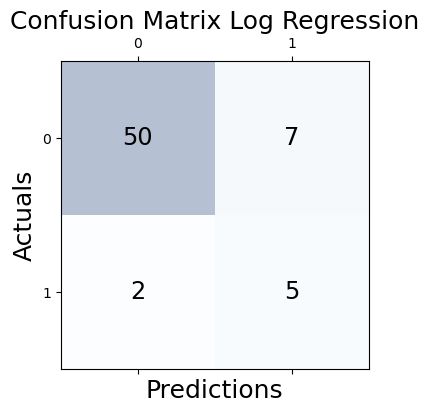

[[50  7]
 [ 2  5]]


0.859375

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test8, y_pred)
accuracy_score(Y_test8, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Log Regression', fontsize=18)
plt.show()
print(cm)
accuracy_score(Y_test8,y_pred)

### Cross validation LogR:

In [96]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR8, X = X_train8, y = Y_train8, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.63 %
Standard Deviation: 3.97 %


# Part_X

## Combined ROC curves:

### Random Forest:

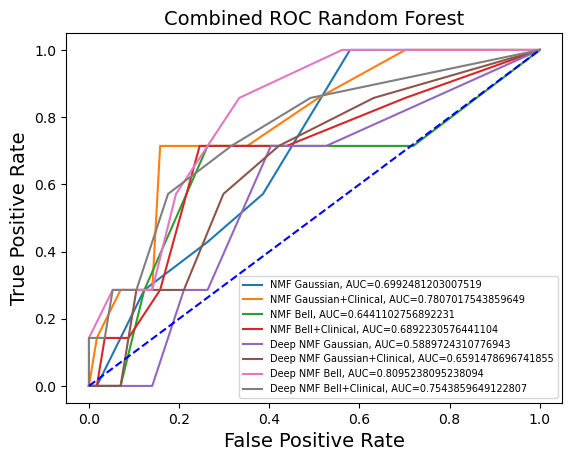

In [97]:
from sklearn import metrics
# NMF Gaussian:
y_prob = classifier1.predict_proba(X_test1)[::,1]
auc = metrics.roc_auc_score(Y_test1, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test1,y_prob)
auc = metrics.roc_auc_score(Y_test1, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Gaussian, AUC="+str(auc))

#NMF Gaussian+Clinical
y_prob = classifier2.predict_proba(X_test2)[::,1]
auc = metrics.roc_auc_score(Y_test2, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test2,y_prob)
auc = metrics.roc_auc_score(Y_test2, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Gaussian+Clinical, AUC="+str(auc))

#NMF Bell:
y_prob = classifier3.predict_proba(X_test3)[::,1]
auc = metrics.roc_auc_score(Y_test3, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test3,y_prob)
auc = metrics.roc_auc_score(Y_test3, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Bell, AUC="+str(auc))

#NMF Bell+Clinical:
y_prob = classifier4.predict_proba(X_test4)[::,1]
auc = metrics.roc_auc_score(Y_test4, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test4,y_prob)
auc = metrics.roc_auc_score(Y_test4, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Bell+Clinical, AUC="+str(auc))

#Deep NMF Gaussian:
y_prob = classifier5.predict_proba(X_test5)[::,1]
auc = metrics.roc_auc_score(Y_test5, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test5,y_prob)
auc = metrics.roc_auc_score(Y_test5, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Gaussian, AUC="+str(auc))

#Deep NMF Gaussian+Clinical:
y_prob = classifier6.predict_proba(X_test6)[::,1]
auc = metrics.roc_auc_score(Y_test6, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test6,y_prob)
auc = metrics.roc_auc_score(Y_test6, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Gaussian+Clinical, AUC="+str(auc))

# Deep NMF Bell:
y_prob = classifier7.predict_proba(X_test7)[::,1]
auc = metrics.roc_auc_score(Y_test7, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test7,y_prob)
auc = metrics.roc_auc_score(Y_test7, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Bell, AUC="+str(auc))

# Deep NMF Bell+Clinical:
y_prob = classifier8.predict_proba(X_test8)[::,1]
auc = metrics.roc_auc_score(Y_test8, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test8,y_prob)
auc = metrics.roc_auc_score(Y_test8, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Bell+Clinical, AUC="+str(auc))

plt.plot(figsize = (9,9))
plt.title("Combined ROC Random Forest",fontsize = 14)
plt.plot([0,1], [0,1], 'b--')
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.legend(fontsize = 7)
plt.show()

### Logistic Regression:

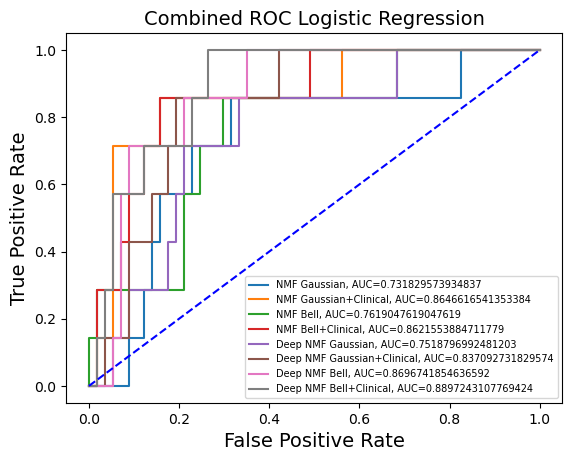

In [98]:
# NMF Gaussian:
y_prob = LR1.predict_proba(X_test1)[::,1]
auc = metrics.roc_auc_score(Y_test1, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test1,y_prob)
auc = metrics.roc_auc_score(Y_test1, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Gaussian, AUC="+str(auc))

#NMF Gaussian+Clinical
y_prob = LR2.predict_proba(X_test2)[::,1]
auc = metrics.roc_auc_score(Y_test2, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test2,y_prob)
auc = metrics.roc_auc_score(Y_test2, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Gaussian+Clinical, AUC="+str(auc))

#NMF Bell:
y_prob = LR3.predict_proba(X_test3)[::,1]
auc = metrics.roc_auc_score(Y_test3, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test3,y_prob)
auc = metrics.roc_auc_score(Y_test3, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Bell, AUC="+str(auc))

#NMF Bell+Clinical:
y_prob = LR4.predict_proba(X_test4)[::,1]
auc = metrics.roc_auc_score(Y_test4, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test4,y_prob)
auc = metrics.roc_auc_score(Y_test4, y_prob)
plt.plot(FalsePRate,TruePRate,label="NMF Bell+Clinical, AUC="+str(auc))

#Deep NMF Gaussian:
y_prob = LR5.predict_proba(X_test5)[::,1]
auc = metrics.roc_auc_score(Y_test5, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test5,y_prob)
auc = metrics.roc_auc_score(Y_test5, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Gaussian, AUC="+str(auc))

#Deep NMF Gaussian+Clinical:
y_prob = LR6.predict_proba(X_test6)[::,1]
auc = metrics.roc_auc_score(Y_test6, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test6,y_prob)
auc = metrics.roc_auc_score(Y_test6, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Gaussian+Clinical, AUC="+str(auc))
# Deep NMF Bell:
y_prob = LR7.predict_proba(X_test7)[::,1]
auc = metrics.roc_auc_score(Y_test7, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test7,y_prob)
auc = metrics.roc_auc_score(Y_test7, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Bell, AUC="+str(auc))

# Deep NMF Bell+Clinical:
y_prob = LR8.predict_proba(X_test8)[::,1]
auc = metrics.roc_auc_score(Y_test8, y_prob)
FalsePRate,TruePRate, _ = metrics.roc_curve(Y_test8,y_prob)
auc = metrics.roc_auc_score(Y_test8, y_prob)
plt.plot(FalsePRate,TruePRate,label="Deep NMF Bell+Clinical, AUC="+str(auc))

plt.plot(figsize = (9,9))
plt.title("Combined ROC Logistic Regression",fontsize = 14)
plt.plot([0,1], [0,1], 'b--')
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.legend(fontsize = 7)
plt.show()

Logistic Regression seems to have better AUC values compared to Random Forest.